In [85]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.__version__)

2.8.0


# Data
**Description**
A bicycle-sharing system, public bicycle scheme, or public bike share (PBS) scheme, is a service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. - Wikipedia
- the  [data](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset) is hosted on kaggle by [Hristo Mavrodiev](https://www.kaggle.com/hmavrodiev)

In [86]:
# Let's start by downloading the data
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /content/london_bike_sharing.csv
100% 1.03M/1.03M [00:00<00:00, 133MB/s]


In [121]:
#load it into a pandas dataframe
df=pd.read_csv("london_bike_sharing.csv",parse_dates=['timestamp'],index_col='timestamp')
rows,features=df.shape
print(f"we have {features} features and {rows} rows")
print(df.head())
print(df.tail())
df.head()

we have 9 features and 17414 rows
                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
                      cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp          

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- as we can see we have 2 years worth of data recorded at an hour interval

## Metadata
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

- "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [123]:
# Let's rename some columns to something more comprehensible
df.rename(columns={"t1":"real_temp","t2":"feel_like_temp"},inplace=True)


In [124]:
df.head()

,cnt,real_temp,feel_like_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Feature engineering 

In [126]:
df['hour']=df.index.hour
df['day_of_week']=df.index.dayofweek
df['day_of_month']=df.index.day
df['month']=df.index.month
print(df.columns)
df.head()

Index(['cnt', 'real_temp', 'feel_like_temp', 'hum', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season', 'hour',
       'day_of_week', 'day_of_month', 'month'],
      dtype='object')


,cnt,real_temp,feel_like_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


Text(0.5, 1.0, 'Bike share counts per month')

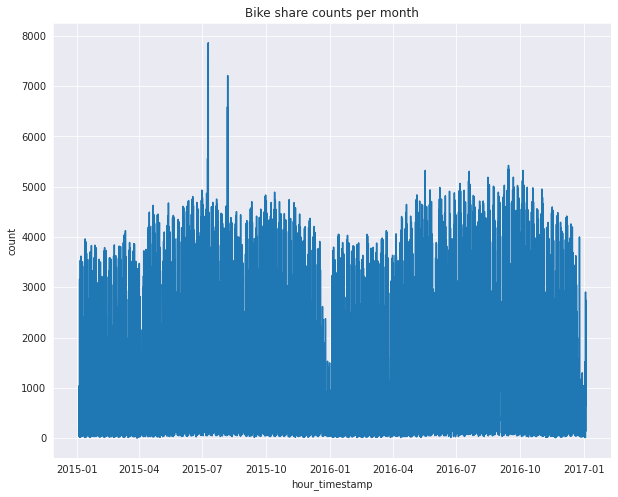

In [127]:
plt.figure(figsize=(10,8))
plt.plot(df['cnt'])
plt.xlabel('hour_timestamp')
plt.ylabel('count')
plt.title('Bike share counts per month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bike share counts per hour')

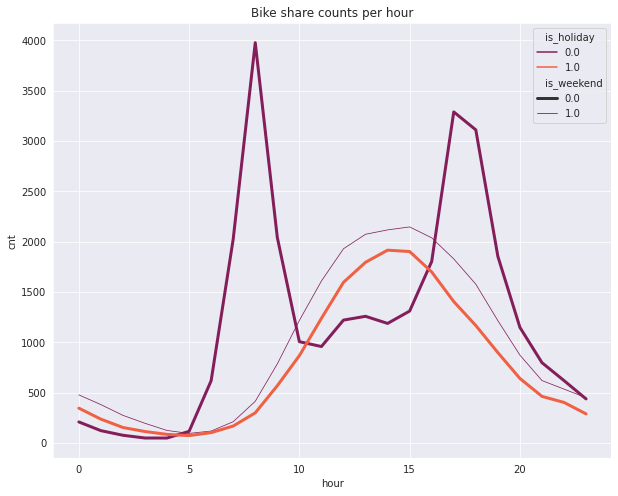

In [128]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.lineplot(df['hour'],df['cnt'],hue=df['is_holiday'],size=df['is_weekend'],ci=None,palette='rocket')
plt.title('Bike share counts per hour')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bike share counts per month')

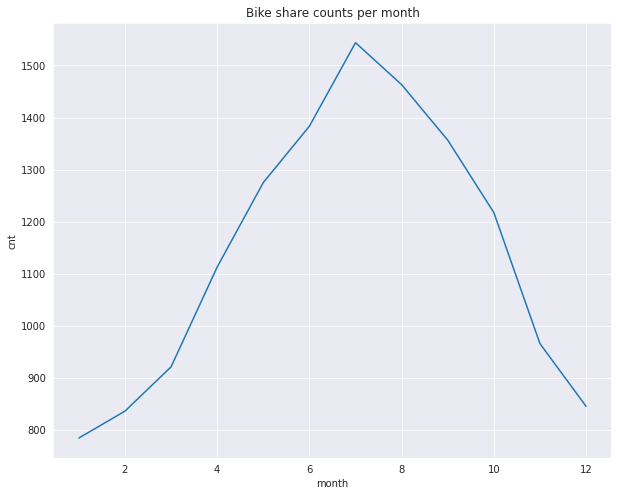

In [129]:
plt.figure(figsize=(10,8))
sns.lineplot(df['month'],df['cnt'],ci=None)
plt.title('Bike share counts per month')

- seasonal component the bike share counts increases steadily during the summer unti reaching a peak during july and after which there's a clear decline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bike share counts per week')

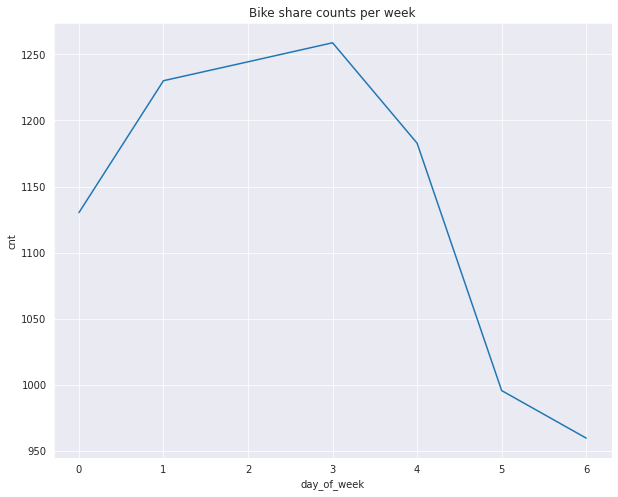

In [130]:
plt.figure(figsize=(10,8))
sns.lineplot(df['day_of_week'],df['cnt'],ci=None)
plt.title('Bike share counts per week')

- Biking activity clearly declines during the weekend (4-->6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bike share counts per day of the month')

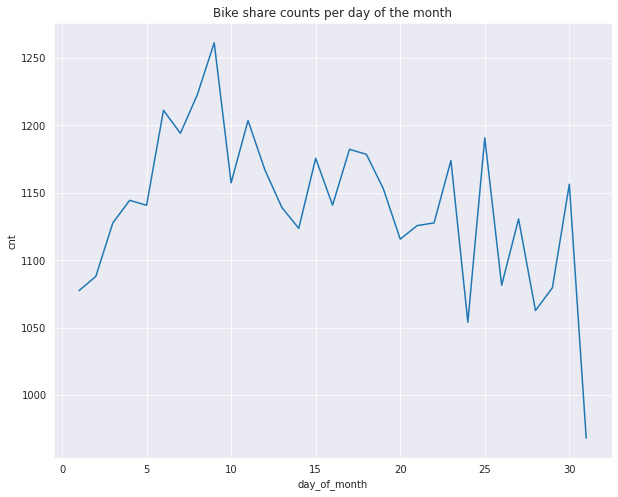

In [131]:
plt.figure(figsize=(10,8))
sns.lineplot(df['day_of_month'],df['cnt'],ci=None)
plt.title('Bike share counts per day of the month')

In [132]:
print(df[df['wind_speed']>30.0])
print(df['weather_code'].value_counts())

                      cnt  real_temp  feel_like_temp   hum  wind_speed  \
timestamp                                                                
2015-01-07 20:00:00   657       10.0             6.5  79.0        30.5   
2015-01-09 04:00:00    47       11.0            11.0  85.0        33.0   
2015-01-09 05:00:00    85       11.5            11.5  85.0        33.0   
2015-01-09 06:00:00   441       12.0            12.0  82.0        32.5   
2015-01-09 07:00:00  1593       12.0            12.0  82.0        31.5   
...                   ...        ...             ...   ...         ...   
2016-12-26 00:00:00   371       13.0            13.0  77.0        31.5   
2016-12-26 01:00:00   243       13.0            13.0  77.0        30.5   
2016-12-26 10:00:00   905        9.0             5.0  58.0        30.5   
2016-12-26 11:00:00  1058        9.0             5.0  56.0        32.5   
2016-12-26 12:00:00  1138        9.0             5.0  54.0        32.0   

                     weather_code  is

In [133]:
def check_windy(df):
  if df["wind_speed"]>30.0:
    return 1.0
  else:
    return 0.0

In [134]:
df["is_windy"]=df.apply(check_windy,axis=1)
df.head()

,cnt,real_temp,feel_like_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month,is_windy
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1,0.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1,0.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1,0.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1,0.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1,0.0


In [99]:
df.is_windy.value_counts()

0.0    16514
1.0      900
Name: is_windy, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bike share counts per hour')

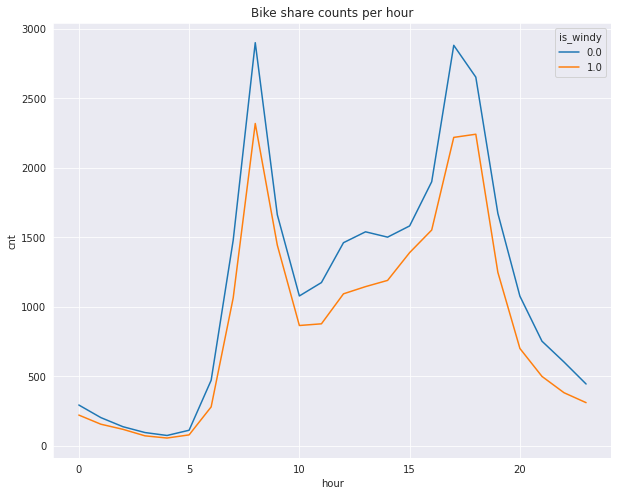

In [135]:
plt.figure(figsize=(10,8))
sns.lineplot(df['hour'],df['cnt'],hue=df['is_windy'],ci=None)
plt.title('Bike share counts per hour')

the seasonal pattern isn't affected by the wind however the bike shares decrease overall

# Preprocessing
- log tanform for the continous variables
- think about removing seasonality


In [101]:
!pip install scikit-learn

In [137]:
import sklearn
print(sklearn.__version__)

1.0.2


In [138]:
from sklearn.preprocessing import StandardScaler
SPLIT=0.8
train_size=int(len(df)*SPLIT)
train_set,test_set=df.iloc[:train_size],df.iloc[train_size:]
print(f"train size={len(train_set)}\ntest_size={len(test_set)}")

train size=13931
test_size=3483


In [139]:
scaled_columns=["cnt","real_temp","feel_like_temp",	"hum"	,"wind_speed"]
scaler=StandardScaler()
scaler=scaler.fit(train_set[scaled_columns].values)
train_set[scaled_columns] = scaler.transform(train_set[scaled_columns].values)
test_set[scaled_columns] = scaler.transform(test_set[scaled_columns].values)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [150]:
train_set

,cnt,real_temp,feel_like_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month,is_windy
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.884983,-1.715016,-1.431917,1.510642,-1.315228,3.0,0.0,1.0,3.0,0,6,4,1,0.0
2015-01-04 01:00:00,-0.925964,-1.715016,-1.355578,1.510642,-1.440628,1.0,0.0,1.0,3.0,1,6,4,1,0.0
2015-01-04 02:00:00,-0.929690,-1.806570,-1.355578,1.755232,-2.067628,1.0,0.0,1.0,3.0,2,6,4,1,0.0
2015-01-04 03:00:00,-0.987436,-1.898124,-1.431917,1.999822,-2.067628,1.0,0.0,1.0,3.0,3,6,4,1,0.0
2015-01-04 04:00:00,-1.010721,-1.898124,-1.737275,1.510642,-1.252528,1.0,0.0,1.0,3.0,4,6,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-09 22:00:00,-0.253500,0.665393,0.705588,-1.144907,0.314973,1.0,0.0,0.0,1.0,22,1,9,8,0.0
2016-08-09 23:00:00,-0.591595,0.482284,0.552909,-0.865375,-0.061228,1.0,0.0,0.0,1.0,23,1,9,8,0.0
2016-08-10 00:00:00,-0.773216,0.390730,0.476570,-0.585844,0.064173,1.0,0.0,0.0,1.0,0,2,10,8,0.0


In [141]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    print(type(y))
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [143]:
TIME_STEPS = 24
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train_set, train_set.cnt, TIME_STEPS)
X_test, y_test = create_dataset(test_set, test_set.cnt, TIME_STEPS)
print(X_train.shape, y_train.shape)
#y is a pandas series (not dataframe) so it doesn't have iloc() method

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(13907, 24, 14) (13907,)


In [155]:
X_test.shape

(3459, 24, 14)

In [156]:
y_test.shape

(3459,)

In [149]:
print(X_train[0][1])

[-0.92596423 -1.71501557 -1.35557796  1.51064182 -1.44062761  1.
  0.          1.          3.          1.          6.          4.
  1.          0.        ]


an example of a training instance as you can see it has 24x14 shape corresponding to the 14 columns for each timestamp

# Predicting Demand

In [151]:
#Importing Libraries
import tensorflow.keras as keras

In [152]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [154]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
392/392 [==============================] - 18s 19ms/step - loss: 0.4567 - val_loss: 0.2458
Epoch 2/30
392/392 [==============================] - 7s 17ms/step - loss: 0.1739 - val_loss: 0.1554
Epoch 3/30
392/392 [==============================] - 6s 17ms/step - loss: 0.1035 - val_loss: 0.1046
Epoch 4/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0848 - val_loss: 0.0975
Epoch 5/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0671 - val_loss: 0.0762
Epoch 6/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0573 - val_loss: 0.0620
Epoch 7/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0498 - val_loss: 0.0695
Epoch 8/30
392/392 [==============================] - 6s 17ms/step - loss: 0.0446 - val_loss: 0.0578
Epoch 9/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0416 - val_loss: 0.0674
Epoch 10/30
392/392 [==============================] - 7s 17ms/step - loss: 0.0369 - val_l

# Evaluation

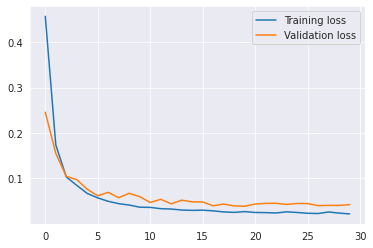

In [157]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [158]:
y_pred=model.predict(X_test)

In [169]:
y_pred.shape

(3459, 1)

In [168]:
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
y_train1=np.repeat(y_train.reshape(-1,1),len(scaled_columns),axis=-1)
y_test1=np.repeat(y_test.reshape(-1,1),len(scaled_columns),axis=1)
print(y_train1.shape," ",y_test1.shape)

(13907, 5)   (3459, 5)


In [170]:
y_pred1=np.repeat(y_pred,len(scaled_columns),axis=-1)
print(y_pred1.shape)

(3459, 5)


In [171]:
y_train_inv=scaler.inverse_transform(y_train1)
y_test_inv=scaler.inverse_transform(y_test1)
y_pred_inv=scaler.inverse_transform(y_pred1)

In [185]:
y_train_inv=y_train_inv[:,0]
y_test_inv=y_test_inv[:,0]
y_pred_inv=y_pred_inv[:,0]

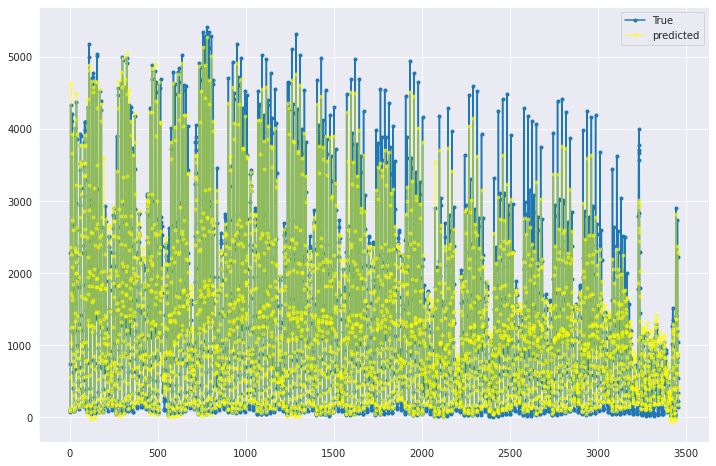

In [199]:
plt.figure(figsize=(12,8))
plt.plot(y_test_inv.flatten(),marker='.',label='True')
plt.plot(y_pred_inv.flatten(),color="yellow",marker='.',label='predicted',alpha=0.5)
plt.legend()

In [200]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
print(f"MSE={mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten())}")
print(f"MAE={mean_absolute_error(y_test_inv.flatten(),y_pred_inv.flatten())}")
print(f"RMSE={sqrt(mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten()))}")



MSE=55651.49895073632
MAE=153.54231253025952
RMSE=235.90569927565616
